In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from pandas import ExcelWriter
from pandas import ExcelFile


In [6]:
df = pd.read_csv('https://query.data.world/s/HqjNNadqEnwSq1qnoV_JqyRJkc7o6O')

In [7]:
df.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89


In [8]:
df.isnull().sum()
df.shape
df.isnull().sum(axis = 0)

Prefix         0
Assignment     2
Tutorial      12
Midterm       16
TakeHome       9
Final          5
dtype: int64

In [9]:
df.drop(df[df.isnull().sum(axis = 1) == 5 ].index, axis = 0, inplace =True)

In [10]:
df.head()
df.shape

(97, 6)

In [11]:
print(df.isnull().sum())

Prefix         0
Assignment     0
Tutorial      10
Midterm       14
TakeHome       7
Final          3
dtype: int64


### Cust_1 to 1


In [12]:


import pandas as pd
df = pd.read_csv('https://query.data.world/s/y9rxL9mGdP6AXPiDaIL4yYm6DsfTV2')

In [13]:
df.head()

,Customer_Name,Province,Region,Customer_Segment,Cust_id
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,Cust_1
1,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,Cust_2
2,CLAY ROZENDAL,NUNAVUT,NUNAVUT,CORPORATE,Cust_3
3,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,Cust_4
4,CARL JACKSON,NUNAVUT,NUNAVUT,CORPORATE,Cust_5


In [14]:
df.Cust_id = df.Cust_id.apply(lambda x : pd.Series(str(x).split("_")[1]))

In [15]:
df.head()

,Customer_Name,Province,Region,Customer_Segment,Cust_id
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,1
1,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,2
2,CLAY ROZENDAL,NUNAVUT,NUNAVUT,CORPORATE,3
3,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,4
4,CARL JACKSON,NUNAVUT,NUNAVUT,CORPORATE,5


### Univariate EDA on Ordered Categorical Variables


In [16]:
df = pd.read_csv("tendulkar_ODI.csv")

In [17]:
df.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


In [22]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  295 non-null    int64 
 1   Runs        295 non-null    object
 2   Mins        295 non-null    object
 3   BF          295 non-null    object
 4   4s          295 non-null    object
 5   6s          295 non-null    object
 6   SR          295 non-null    object
 7   Pos         295 non-null    object
 8   Dismissal   295 non-null    object
 9   Inns        295 non-null    object
 10  Opposition  295 non-null    object
 11  Ground      295 non-null    object
 12  Start Date  295 non-null    object
dtypes: int64(1), object(12)
memory usage: 30.1+ KB


(295, 13)

In [21]:
# Need to clean data as Runs contains * and 4s contains '-'
df.Runs.unique()

array(['0', '36', '19', '31', '53', '30', 'DNB', '4', '62', '1', '57',
       '21', '69', '11', '84', '39', '15', '10', '22', '32', '23', '82*',
       '3', '24', '5', '34', '8*', '25', '26*', '2', '28*', '11*', '52',
       '82', '63', '40', '6', '8', '115', '66', '54', '88', '105', '13',
       '7', '65', '127*', '70', '90', '137', '110', '64', '28', '67',
       '114', '14', '45', '44', '65*', '9', '117', '27', '100', '33',
       '18', '100*', '17', '128', '29', '37', '120', '186*', '12', '26',
       '122', '93', '146', '35', '139', '70*', '101', '38', '68', '87*',
       '34*', '81', '89', '102', '86', '141', '74', '16', '47', '123',
       '67*', '42', '95', '55', '60', 'TDNB', '99', '71', '94', '43',
       '79', '72', '97', '117*', '91', '50', '20', '163*', '138', '175',
       '96*', '200*', '111', '85'], dtype=object)

In [38]:
#There are values like DNB and TDNB 
df.loc[df.Runs == 'DNB'].index

Int64Index([8, 38], dtype='int64')

In [41]:
#Dropping rows with Runs DNB and TDNB
df = df.drop(df.loc[df.Runs == 'DNB'].index)
df = df.drop(df.loc[df.Runs == 'TDNB'].index)

In [42]:
df.Runs.unique()

array(['0', '36', '19', '31', '53', '30', '4', '62', '1', '57', '21',
       '69', '11', '84', '39', '15', '10', '22', '32', '23', '82*', '3',
       '24', '5', '34', '8*', '25', '26*', '2', '28*', '11*', '52', '82',
       '63', '40', '6', '8', '115', '66', '54', '88', '105', '13', '7',
       '65', '127*', '70', '90', '137', '110', '64', '28', '67', '114',
       '14', '45', '44', '65*', '9', '117', '27', '100', '33', '18',
       '100*', '17', '128', '29', '37', '120', '186*', '12', '26', '122',
       '93', '146', '35', '139', '70*', '101', '38', '68', '87*', '34*',
       '81', '89', '102', '86', '141', '74', '16', '47', '123', '67*',
       '42', '95', '55', '60', '99', '71', '94', '43', '79', '72', '97',
       '117*', '91', '50', '20', '163*', '138', '175', '96*', '200*',
       '111', '85'], dtype=object)

In [45]:
# Now Runs contain * in some cases need to remove
df.Runs = df.Runs.apply(lambda x : int(x) if (x.find('*') == -1) else int(x[:-1]))

In [46]:
df.Runs.unique()

array([  0,  36,  19,  31,  53,  30,   4,  62,   1,  57,  21,  69,  11,
        84,  39,  15,  10,  22,  32,  23,  82,   3,  24,   5,  34,   8,
        25,  26,   2,  28,  52,  63,  40,   6, 115,  66,  54,  88, 105,
        13,   7,  65, 127,  70,  90, 137, 110,  64,  67, 114,  14,  45,
        44,   9, 117,  27, 100,  33,  18,  17, 128,  29,  37, 120, 186,
        12, 122,  93, 146,  35, 139, 101,  38,  68,  87,  81,  89, 102,
        86, 141,  74,  16,  47, 123,  42,  95,  55,  60,  99,  71,  94,
        43,  79,  72,  97,  91,  50,  20, 163, 138, 175,  96, 200, 111,
        85], dtype=int64)

In [47]:
#Check Another colums that is 4s

In [50]:
df['4s'] = df['4s'].apply(lambda x : int(x))

In [51]:
df['4s'].unique()

array([ 0,  5,  1,  3,  7,  2,  8,  6,  4, 15,  9, 13, 10, 14, 11, 20, 12,
       19, 17, 16, 25], dtype=int64)

##### Plot a bar chart showing runs scored on the x-axis and frequency/count on the y-axis

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
df.Runs.value_counts()

1     16
2     14
0     12
4      9
21     8
      ..
87     1
89     1
90     1
91     1
60     1
Name: Runs, Length: 105, dtype: int64

AttributeError: 'Rectangle' object has no property 'bins'

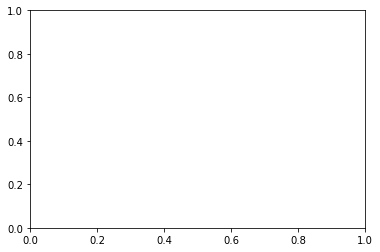

In [81]:
bins = [0,10,20,30,40,50,75,100,125,150,200,250]
df.Runs.value_counts().plot(kind= 'bar')

In [75]:
# on 4s

<AxesSubplot:>

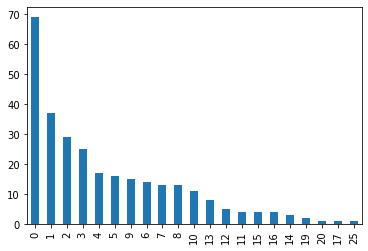

In [79]:
bins = [0,1,2,3,4,5,6,7,8,9,10,15,20,25]
df['4s'].value_counts().plot(kind='bar')